# SOHO

(summary from chatgpt)

The SOHO (Solar and Heliospheric Observatory) spacecraft's SEM (Solar Extreme Ultraviolet Monitor) instrument is designed to monitor and measure solar extreme ultraviolet (EUV) radiation. The SEM provides valuable data for understanding the Sun’s influence on the Earth's upper atmosphere and space weather. The SEM instrument has different channels, each tailored to specific wavelengths and uses.

SOHO SEM Channels and Their Uses:
## 0.1–50 nm Channel (Total EUV flux):
Purpose: This channel measures the total EUV flux in a broad range, which includes significant EUV and soft X-ray radiation from the Sun.

Usefulness: Data from this channel are critical for understanding the total EUV energy input to the Earth's atmosphere, which affects the ionosphere and thermosphere. This can impact radio communications, satellite orbits, and GPS accuracy.

## 26–34 nm Channel (He II 30.4 nm):
Purpose: This channel is focused on detecting solar emissions primarily around the 30.4 nm line, which corresponds to singly ionized helium (He II).

Usefulness: The 30.4 nm line is important for studying the solar corona and chromosphere, as it provides information about the behavior of the Sun’s upper atmosphere. This line is also significant for understanding ionospheric photoionization processes and monitoring space weather impacts on Earth.

## 1–50 nm Channel (broad soft X-ray and EUV):
Purpose: This channel captures a wide range of EUV and soft X-ray radiation.

Usefulness: Measurements in this range provide insights into solar flares and active regions on the Sun. Solar flares emit high amounts of energy in the EUV and X-ray spectrum, which can cause sudden increases in ionization in the Earth's atmosphere, leading to radio blackouts and other disturbances.

## Applications of SOHO SEM Data:
Space Weather Monitoring: Data from SEM channels help predict and monitor space weather conditions, which can impact satellite operations, astronaut safety, and power grids on Earth.

Solar Physics Research: SEM data contribute to understanding the mechanisms of solar activity, including solar flares and coronal mass ejections (CMEs).

Atmospheric Science: The instrument's measurements of solar EUV radiation help model how the Earth's upper atmosphere responds to solar variability, affecting the density and composition of the ionosphere and thermosphere.
Overall, the SOHO SEM instrument provides vital information for scientists studying the Sun's influence on the Earth and its surrounding space environment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seppy
from seppy.loader.soho import soho_load

In [5]:
df, meta = soho_load(dataset="SOHO_CELIAS-SEM_15S",
                     startdate="2023/06/21",
                     enddate="2024/06/21")

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

soho_celias-sem_15s_20240419_v04.cdf:   0%|          | 0.00/301k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

soho_celias-sem_15s_20240426_v04.cdf:   0%|          | 0.00/235k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

soho_celias-sem_15s_20240514_v04.cdf:   0%|          | 0.00/301k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

soho_celias-sem_15s_20240515_v04.cdf:   0%|          | 0.00/301k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

soho_celias-sem_15s_20240615_v04.cdf:   0%|          | 0.00/177k [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x100dd76a0>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 726, in __del__
    self.close()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/signal.py", line 58, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x100dd76a0>
Traceback (most recent call last):
  File

In [11]:
import os
import pandas as pd
from cdflib import CDF

# Path to the directory containing downloaded .cdf files
data_directory = '/Users/gregniemeyer/sunpy/data'

# Initialize lists to store DataFrames and metadata
dataframes = []
metadata_list = []

# Iterate over all .cdf files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".cdf"):
        file_path = os.path.join(data_directory, filename)
        
        # Open the CDF file
        with CDF(file_path) as cdf_file:
            # Extract variables and data
            variables = cdf_file.cdf_info().rVariables
            data_dict = {var: cdf_file[var][...] for var in variables}
            
            # Create a DataFrame for this file
            df = pd.DataFrame(data_dict)
            dataframes.append(df)
            
            # Optionally, collect metadata if needed
            meta = cdf_file.globalattsget()
            metadata_list.append(meta)

# Concatenate all DataFrames
combined_df = pd.concat(dataframes, ignore_index=True)

# Optionally, combine metadata
# This assumes the metadata has similar structure across files
combined_metadata = {k: [meta.get(k) for meta in metadata_list] for k in metadata_list[0]}

# Display combined DataFrame and metadata (optional)
print(combined_df)
print("Metadata:", combined_metadata)


Empty DataFrame
Columns: []
Index: []
Metadata: {'Project': [['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial Physics'], ['ISTP>International Solar-Terrestrial 

In [4]:
# change time resolution to get smoother curve
averaging = '60min' 
df_ave = df.resample(averaging).mean()

NameError: name 'df' is not defined

In [237]:
plt.figure(figsize=(10, 5))  # 10 inches wide, 6 inches tall
for name in df_ave.columns:
    df_ave[name].plot()

Index(['CH1', 'CH2', 'CH3', 'HC_POS_0', 'HC_POS_1', 'HC_POS_2', 'HC_R', 'R_AU',
       'central_order_flux', 'first_order_flux'],
      dtype='object')

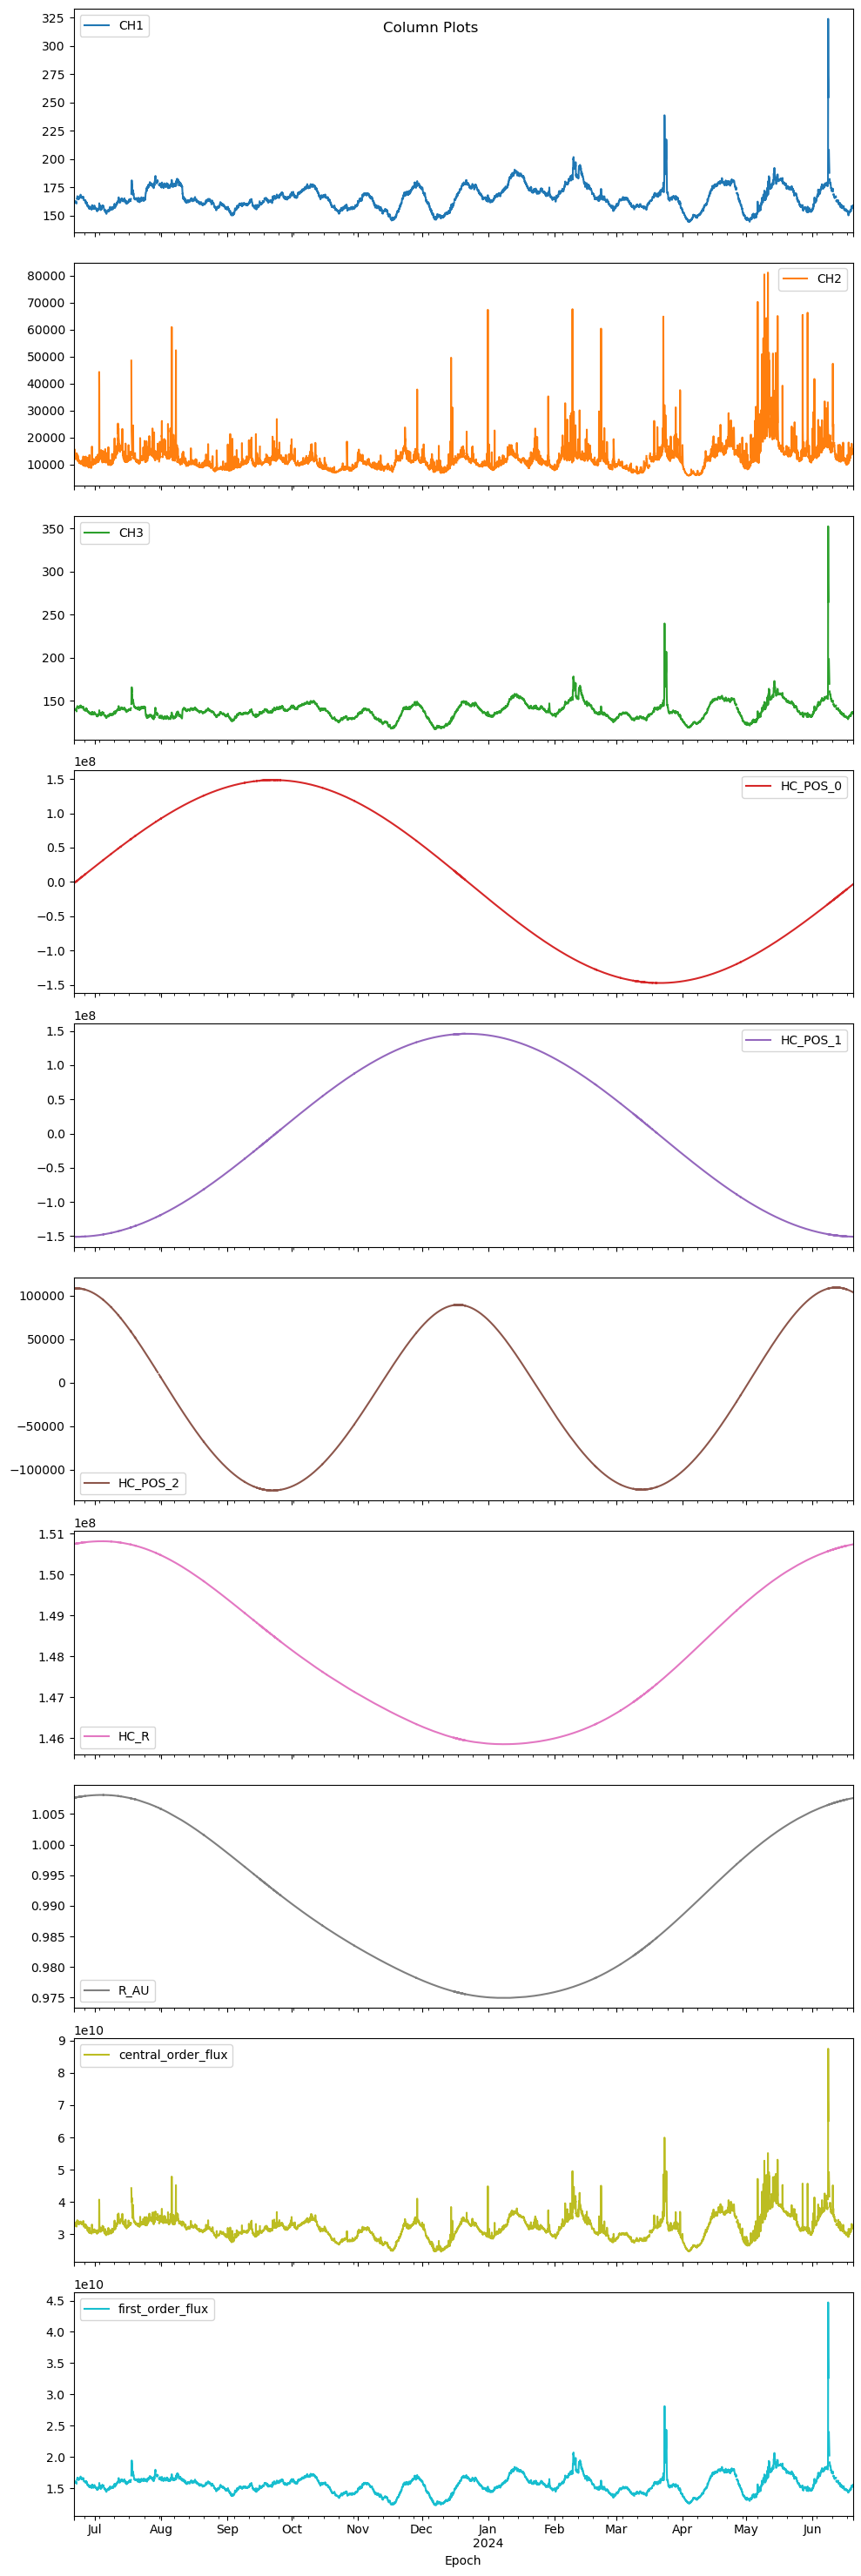

In [238]:
df_ave.plot(subplots=True, layout=(len(df.columns), 1), figsize=(10, len(df.columns) * 3), title="Column Plots")
plt.tight_layout()  # Adjust layout to avoid overlap

In [241]:
fpath = '..data/soho/'
for name in df.columns:
    tem = df_ave[name]
    fout = fpath + '/soho_'+ name + '.csv'
    tem.to_csv(fout)